In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import os
import tensorflow as tf
from tensorflow import keras

# Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

# Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

- GRE Scores ( out of 340 ) --> **GRE Score**
- TOEFL Scores ( out of 120 ) --> **TOEFL Score**
- University Rating ( out of 5 ) --> **University Rating**
- Statement of Purpose --> **SOP**
- Letter of Recommendation Strength ( out of 5 ) --> **LOR**
- Undergraduate GPA ( out of 10 ) --> **CGPA**
- Research Experience ( either 0 or 1 ) --> **Research**
- Chance of Admit ( ranging from 0 to 1 ) --> **Chance of Admit**

# Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

# Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

# Citation
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019



In [2]:
df_admission=pd.read_csv('./datasets/Admission/Admission_Predict_Ver1.1.csv')


In [3]:
df_admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df_admission.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [5]:
df_admission.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df_admission["Chance of Admit "].hist(legend=True,a)

SyntaxError: positional argument follows keyword argument (3823493549.py, line 1)

In [ ]:
# Create the histogram using seaborn
sns.histplot(data=df_admission, x="Chance of Admit ", bins=20, kde=False, alpha=0.7)

# Add labels and title
plt.xlabel("Chance of Admit")
plt.ylabel("Frequency")
plt.title("Histogram of Chance of Admit")

# Add a legend
plt.legend(["Chance of Admit"])

# Display the histogram
plt.show()

In [11]:
df_admission=df_admission.drop(columns=['Serial No.'])

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_admission.corr(), annot=True,cmap='YlOrBr')

In [ ]:
c = df_admission.corr().abs()

upper_corr_mat = c.where(
    np.triu(np.ones(c.shape), k=1).astype(bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df_admission)

In [12]:
df_admission

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [14]:
df_admission.to_csv("admission_data.csv")

In [ ]:
df_admission_All=df_admission
df_admission_confounder=df_admission.drop(columns=['GRE Score'])

In [7]:
df_admission.loc[(df_admission['GRE Score'] >= 330) & (df_admission['TOEFL Score'] <= 110)]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87


In [8]:
df_admission.loc[(df_admission['GRE Score'] >= 332)].shape

(47, 9)

In [9]:
df_admission.loc[(df_admission['Chance of Admit '] >= 0.87)].shape

(93, 9)

# With all the Data and no confounding Variables

In [8]:
X_all=df_admission_All.drop(columns=['Chance of Admit '])
y_all=df_admission_All[['Chance of Admit ']]

In [9]:
X_all

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y_all

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [11]:
X_train_all, X_test_all = train_test_split(X_all, test_size=0.2,shuffle=False)
y_train_all, y_test_all = train_test_split(y_all, test_size=0.2,shuffle=False)

In [12]:
X_train_all

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [13]:
y_train_all.to_numpy().ravel()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [244]:
regr = MLPRegressor(hidden_layer_sizes=(20,20,60),max_iter=500,random_state=420,batch_size=30).fit(X_train_all, y_train_all.to_numpy().ravel())
np.mean(cross_val_score(regr, X_train_all, y_train_all, cv=5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.5697808567015072

In [245]:
regr.score(X_test_all, y_test_all.to_numpy().ravel())

0.7154679114985525

In [246]:
regr.predict(X_test_all)

array([0.62567236, 0.6229675 , 0.78956957, 0.88272718, 0.64633099,
       0.57440176, 0.78096413, 0.61085878, 0.56584672, 0.52841472,
       0.5152152 , 0.77926813, 0.73707209, 0.75540642, 0.74378949,
       0.77441247, 0.70509256, 0.69811066, 0.61971728, 0.58322567,
       0.52033577, 0.76546261, 0.82969202, 0.93315507, 0.86886007,
       0.87707069, 0.62846125, 0.69700349, 0.55192187, 0.89333081,
       0.74278446, 0.80726026, 0.88850935, 0.72753838, 0.65310924,
       0.54296166, 0.55279087, 0.53899769, 0.70904448, 0.53840042,
       0.58719526, 0.64031148, 0.91662239, 0.89748747, 0.84701869,
       0.88651349, 0.98681728, 0.76284964, 0.66927126, 0.68928483,
       0.75822548, 0.89198622, 0.98423527, 0.68531718, 0.60564621,
       0.50736112, 0.55119009, 0.51232757, 0.66056121, 0.8689324 ,
       0.75615829, 0.66366191, 0.61035854, 0.66556113, 0.50469055,
       0.66250676, 0.76090104, 0.77956908, 0.79913062, 0.86906242,
       0.8459437 , 0.54902574, 0.89304329, 0.65793584, 0.68609

In [247]:
y_test_all.to_numpy().ravel()

array([0.63, 0.66, 0.78, 0.91, 0.62, 0.52, 0.61, 0.58, 0.57, 0.61, 0.54,
       0.56, 0.59, 0.49, 0.72, 0.76, 0.65, 0.52, 0.6 , 0.58, 0.42, 0.77,
       0.73, 0.94, 0.91, 0.92, 0.71, 0.71, 0.69, 0.95, 0.74, 0.73, 0.86,
       0.71, 0.64, 0.55, 0.58, 0.61, 0.67, 0.66, 0.53, 0.79, 0.92, 0.87,
       0.92, 0.91, 0.93, 0.84, 0.8 , 0.79, 0.82, 0.89, 0.93, 0.73, 0.71,
       0.59, 0.51, 0.37, 0.69, 0.89, 0.77, 0.68, 0.62, 0.57, 0.45, 0.54,
       0.71, 0.78, 0.81, 0.86, 0.87, 0.64, 0.9 , 0.67, 0.67, 0.59, 0.62,
       0.65, 0.71, 0.79, 0.8 , 0.78, 0.83, 0.71, 0.73, 0.7 , 0.68, 0.79,
       0.76, 0.65, 0.67, 0.54, 0.53, 0.62, 0.68, 0.87, 0.96, 0.93, 0.73,
       0.84])

In [248]:
mean_squared_error(regr.predict(X_test_all),y_test_all)

0.005156094180682164

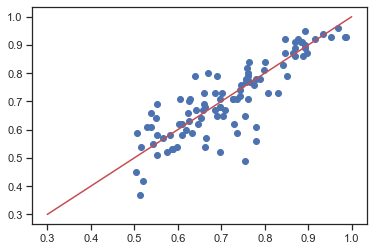

In [249]:
x=np.linspace(0.3,1,101) 
plt.scatter(regr.predict(X_test_all), y_test_all)
plt.plot(x,x,'r')
plt.show()

In [251]:
result = permutation_importance(
        regr, X_test_all, y_test_all, n_repeats=10, random_state=42, n_jobs=2
)

regr_all_importances = pd.Series(result.importances_mean,index=X_all.columns)

In [252]:
regr_all_importances

GRE Score            0.159918
TOEFL Score          0.192268
University Rating    0.044775
SOP                  0.300045
LOR                 -0.040611
CGPA                 0.268459
Research             0.091439
dtype: float64

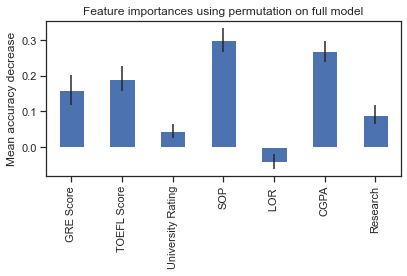

In [266]:
fig, ax = plt.subplots()
regr_all_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# With GRE Score as confounding variable

In [14]:
X_con=df_admission_confounder.drop(columns=['Chance of Admit '])
y_con=df_admission_confounder[['Chance of Admit ']]

In [15]:
X_con

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,118,4,4.5,4.5,9.65,1
1,107,4,4.0,4.5,8.87,1
2,104,3,3.0,3.5,8.00,1
3,110,3,3.5,2.5,8.67,1
4,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...
495,108,5,4.5,4.0,9.02,1
496,117,5,5.0,5.0,9.87,1
497,120,5,4.5,5.0,9.56,1
498,103,4,4.0,5.0,8.43,0


In [16]:
X_train_con, X_test_con = train_test_split(X_con, test_size=0.2,shuffle=False)
y_train_con, y_test_con = train_test_split(y_con, test_size=0.2,shuffle=False)

In [255]:
regr_con = MLPRegressor(hidden_layer_sizes=(20,20,60),max_iter=500,random_state=420,batch_size=30).fit(X_train_con, y_train_con.to_numpy().ravel())
np.mean(cross_val_score(regr, X_train_con, y_train_con, cv=5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.6668492291906296

In [256]:
regr_con.score(X_test_con, y_test_con.to_numpy().ravel())

0.6706573001463059

In [257]:
mean_squared_error(regr_con.predict(X_test_con),y_test_con)

0.005968121160285743

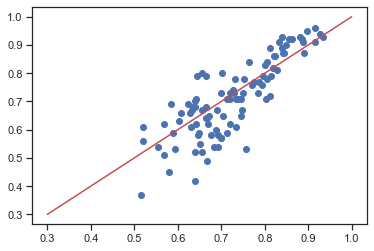

In [258]:
x=np.linspace(0.3,1,101) 
plt.scatter(regr_con.predict(X_test_con), y_test_con)
plt.plot(x,x,'r')
plt.show()

In [261]:
from sklearn.inspection import permutation_importance


result_con = permutation_importance(
    regr_con, X_test_con, y_test_con, n_repeats=10, random_state=42, n_jobs=2
)

regr_con_importances = pd.Series(result_con.importances_mean,index=X_con.columns)

In [262]:
regr_con_importances

TOEFL Score          0.302361
University Rating    0.247274
SOP                  0.034889
LOR                  0.061659
CGPA                -0.039238
Research             0.065665
dtype: float64

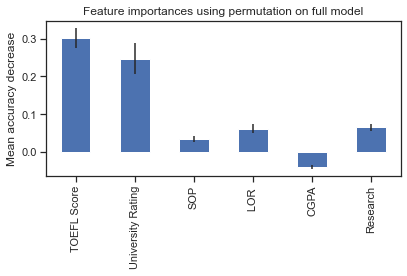

In [265]:
fig, ax = plt.subplots()
regr_con_importances.plot.bar(yerr=result_con.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


In [18]:
T_X_train_all = torch.tensor(X_train_con.values).to(torch.float32)
T_X_train_all.dtype

torch.float32

In [19]:
T_y_train_all = torch.tensor(y_train_con.values).to(torch.float32)
T_y_train_all.dtype

torch.float32

In [20]:
dataset = TensorDataset(T_X_train_all,T_y_train_all)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

In [21]:
n_input, n_hidden, n_out, batch_size, learning_rate = 6, 50, 1, 10, 0.01

In [664]:
model = nn.Sequential(nn.Linear(n_input, 50),
                      nn.ReLU(),
                      nn.Linear(50, 20),
                      nn.ReLU(),
                      nn.Linear(20, 1),
                      nn.Sigmoid()
                      )
                    
print(model)

Sequential(
  (0): Linear(in_features=6, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=1, bias=True)
  (5): Sigmoid()
)


In [665]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)

tensor(0., grad_fn=<MseLossBackward0>)
tensor(3.1476e-05, grad_fn=<MseLossBackward0>)
tensor(9.5881e-11, grad_fn=<MseLossBackward0>)
tensor(3.1423e-05, grad_fn=<MseLossBackward0>)
tensor(3.7561e-10, grad_fn=<MseLossBackward0>)
tensor(3.1374e-05, grad_fn=<MseLossBackward0>)
tensor(8.4106e-10, grad_fn=<MseLossBackward0>)
tensor(3.1324e-05, grad_fn=<MseLossBackward0>)
tensor(1.4880e-09, grad_fn=<MseLossBackward0>)
tensor(3.1279e-05, grad_fn=<MseLossBackward0>)
tensor(2.3030e-09, grad_fn=<MseLossBackward0>)
tensor(3.1241e-05, grad_fn=<MseLossBackward0>)
tensor(3.2866e-09, grad_fn=<MseLossBackward0>)
tensor(3.1200e-05, grad_fn=<MseLossBackward0>)
tensor(4.4521e-09, grad_fn=<MseLossBackward0>)
tensor(3.1166e-05, grad_fn=<MseLossBackward0>)
tensor(5.7716e-09, grad_fn=<MseLossBackward0>)
tensor(3.1132e-05, grad_fn=<MseLossBackward0>)
tensor(7.2739e-09, grad_fn=<MseLossBackward0>)
tensor(3.1103e-05, grad_fn=<MseLossBackward0>)
tensor(8.9263e-09, grad_fn=<MseLossBackward0>)
tensor(3.1076e-05, gr

tensor(5.8603e-06, grad_fn=<MseLossBackward0>)
tensor(5.4477e-05, grad_fn=<MseLossBackward0>)
tensor(5.9065e-06, grad_fn=<MseLossBackward0>)
tensor(5.4560e-05, grad_fn=<MseLossBackward0>)
tensor(5.9520e-06, grad_fn=<MseLossBackward0>)
tensor(5.4636e-05, grad_fn=<MseLossBackward0>)
tensor(5.9950e-06, grad_fn=<MseLossBackward0>)
tensor(5.4704e-05, grad_fn=<MseLossBackward0>)
tensor(6.0370e-06, grad_fn=<MseLossBackward0>)
tensor(5.4770e-05, grad_fn=<MseLossBackward0>)
tensor(6.0758e-06, grad_fn=<MseLossBackward0>)
tensor(5.4821e-05, grad_fn=<MseLossBackward0>)
tensor(6.1117e-06, grad_fn=<MseLossBackward0>)
tensor(5.4865e-05, grad_fn=<MseLossBackward0>)
tensor(6.1469e-06, grad_fn=<MseLossBackward0>)
tensor(5.4903e-05, grad_fn=<MseLossBackward0>)
tensor(6.1793e-06, grad_fn=<MseLossBackward0>)
tensor(5.4936e-05, grad_fn=<MseLossBackward0>)
tensor(6.2105e-06, grad_fn=<MseLossBackward0>)
tensor(5.4960e-05, grad_fn=<MseLossBackward0>)
tensor(6.2388e-06, grad_fn=<MseLossBackward0>)
tensor(5.4974

tensor(4.3968e-05, grad_fn=<MseLossBackward0>)
tensor(5.5639e-06, grad_fn=<MseLossBackward0>)
tensor(4.3830e-05, grad_fn=<MseLossBackward0>)
tensor(5.5666e-06, grad_fn=<MseLossBackward0>)
tensor(4.3691e-05, grad_fn=<MseLossBackward0>)


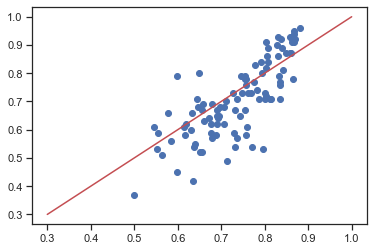

In [673]:
losses = []
T_X_test_con = torch.tensor(X_test_con.values).to(torch.float32)
y_test_pred = model(T_X_test_con)
for epoch in range(500
                  ):
    pred_y = model(T_X_train_all)
    loss = loss_function(pred_y, T_y_train_all)
    print(loss_function(model(T_X_test_con), y_test_pred))
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()

    optimizer.step()

x=np.linspace(0.3,1,101) 
plt.scatter(y_test_pred.detach().numpy(), y_test_con)
plt.plot(x,x,'r')
plt.show()

tensor([[0.5000],
        [0.6993],
        [0.7014],
        [0.5000],
        [0.6048],
        [0.6048],
        [0.7561],
        [0.7468],
        [0.6048],
        [0.5000],
        [0.6048],
        [0.6634],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.7880],
        [0.7327],
        [0.7291],
        [0.6048],
        [0.5000],
        [0.5000],
        [0.7466],
        [0.5000],
        [0.6048],
        [0.5000],
        [0.5000],
        [0.7994],
        [0.6048],
        [0.5000],
        [0.6048],
        [0.7152],
        [0.6541],
        [0.5000],
        [0.6048],
        [0.5000],
        [0.7381],
        [0.6048],
        [0.6048],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.6048],
        [0.6048],
        [0.5000],
        [0.6048],
        [0.5000],
        [0.7833],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.7452],
        [0.7398],
        [0.7160],
        [0

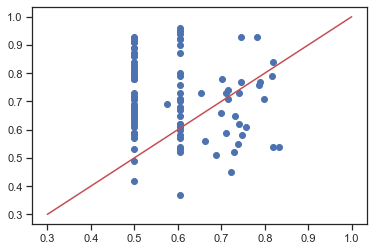

In [674]:
!pip install -U skorch


  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


In [770]:
from skorch import NeuralNetRegressor

In [821]:
class MyModule(nn.Module):
    def __init__(self,num_units=10,nonlin=nn.ReLU()):
        super().__init__()

        self.dense0 = nn.Linear(6, num_units)
        self.nonlin = nonlin
        self.sig= nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 1)


    def forward(self, X,**kwargs):
        X=X.float()
        X = self.nonlin(self.dense0(X))
        X = self.nonlin(self.dense1(X))
        X=self.output(X)
        X= self.sig(X)
        return X

In [822]:
net = NeuralNetRegressor(
    MyModule,
    max_epochs=200,
    train_split=None,
    lr=0.001,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)

In [22]:
X=X_train_con.to_numpy().astype('float32')
X

array([[118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       ...,
       [116.  ,   4.  ,   5.  ,   4.5 ,   9.45,   1.  ],
       [103.  ,   3.  ,   3.5 ,   4.  ,   8.78,   0.  ],
       [117.  ,   4.  ,   5.  ,   4.  ,   9.66,   1.  ]], dtype=float32)

In [23]:
y=y_train_con.to_numpy().ravel().astype('float32')
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

Re-initializing module.
Re-initializing criterion.
Re-initializing optimizer.
  epoch    train_loss     dur
-------  ------------  ------
      1        0.0484  0.0081
      2        0.0467  0.0060
      3        0.0453  0.0060
      4        0.0436  0.0068
      5        0.0421  0.0000
      6        0.0406  0.0169
      7        0.0391  0.0006
      8        0.0375  0.0000
      9        0.0361  0.0055
     10        0.0347  0.0105
     11        0.0333  0.0000
     12        0.0320  0.0000
     13        0.0309  0.0004
     14        0.0297  0.0000
     15        0.0286  0.0166
     16        0.0276  0.0000
     17        0.0266  0.0166
     18        0.0256  0.0168
     19        0.0248  0.0165
     20        0.0241  0.0055
     21        0.0235  0.0107
     22        0.0228  0.0000
     23        0.0222  0.0000
     24        0.0218  0.0167
     25        0.0214  0.0000
     26        0.0210  0.0166
     27        0.0207  0.0000
     28        0.0204  0.0167
     29        0.0203 

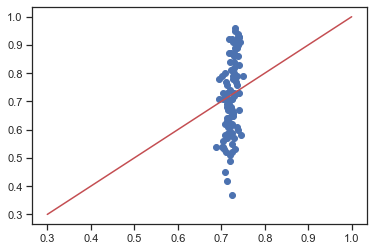

In [826]:
net.fit(X,y.reshape(-1, 1))
x=np.linspace(0.3,1,101) 
plt.scatter(net.predict(X_test_con.to_numpy().astype('float32')), y_test_con.to_numpy().ravel().astype('float32'))
plt.plot(x,x,'r')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)
params = {
    'lr': [0.1,0.01,0.001,0.00001],
    'max_epochs': [100,500,1000,5000],
    'module__num_units': [30,50,70,100,150,200],
}
gs = GridSearchCV(net, params, refit=True, cv=5, scoring="r2", verbose=3)

gs.fit(X, y.reshape(-1, 1))
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END lr=0.1, max_epochs=100, module__num_units=30;, score=-3.644 total time=   0.3s
[CV 2/5] END lr=0.1, max_epochs=100, module__num_units=30;, score=-2.812 total time=   0.4s
[CV 3/5] END lr=0.1, max_epochs=100, module__num_units=30;, score=-4.375 total time=   0.4s
[CV 4/5] END lr=0.1, max_epochs=100, module__num_units=30;, score=-50.402 total time=   0.4s
[CV 5/5] END lr=0.1, max_epochs=100, module__num_units=30;, score=-3.953 total time=   0.3s
[CV 1/5] END lr=0.1, max_epochs=100, module__num_units=50;, score=-3.644 total time=   0.4s
[CV 2/5] END lr=0.1, max_epochs=100, module__num_units=50;, score=-2.812 total time=   0.4s
[CV 3/5] END lr=0.1, max_epochs=100, module__num_units=50;, score=-48.417 total time=   0.4s
[CV 4/5] END lr=0.1, max_epochs=100, module__num_units=50;, score=-6.869 total time=   0.4s
[CV 5/5] END lr=0.1, max_epochs=100, module__num_units=50;, score=-3.953 total time=   0.4s
[CV 1/5] END lr=

[CV 4/5] END lr=0.1, max_epochs=1000, module__num_units=200;, score=-50.403 total time=   9.0s
[CV 5/5] END lr=0.1, max_epochs=1000, module__num_units=200;, score=-3.953 total time=   7.6s
[CV 1/5] END lr=0.1, max_epochs=5000, module__num_units=30;, score=-3.644 total time=  31.7s
[CV 2/5] END lr=0.1, max_epochs=5000, module__num_units=30;, score=0.307 total time=  33.1s
[CV 3/5] END lr=0.1, max_epochs=5000, module__num_units=30;, score=0.745 total time=  31.0s
[CV 4/5] END lr=0.1, max_epochs=5000, module__num_units=30;, score=-6.869 total time=  32.3s
[CV 5/5] END lr=0.1, max_epochs=5000, module__num_units=30;, score=-3.953 total time=  31.4s
[CV 1/5] END lr=0.1, max_epochs=5000, module__num_units=50;, score=-3.644 total time=  32.5s
[CV 2/5] END lr=0.1, max_epochs=5000, module__num_units=50;, score=-2.812 total time=  31.9s
[CV 3/5] END lr=0.1, max_epochs=5000, module__num_units=50;, score=-48.417 total time=  33.6s
[CV 4/5] END lr=0.1, max_epochs=5000, module__num_units=50;, score=-

In [830]:
gs.best_estimator_

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=MyModule(
    (dense0): Linear(in_features=6, out_features=50, bias=True)
    (nonlin): ReLU()
    (sig): Sigmoid()
    (dropout): Dropout(p=0.5, inplace=False)
    (dense1): Linear(in_features=50, out_features=50, bias=True)
    (output): Linear(in_features=50, out_features=1, bias=True)
  ),
)

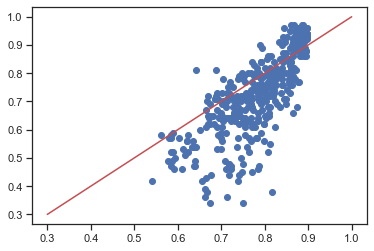

In [832]:
x=np.linspace(0.3,1,101) 
plt.scatter(gs.best_estimator_.predict(X), y.reshape(-1, 1))
plt.plot(x,x,'r')
plt.show()

In [24]:
from tpot import TPOTRegressor

In [28]:

pipeline_optimizer = TPOTRegressor(generations=200, population_size=100, cv=3,verbosity=2,n_jobs=3)

In [29]:
pipeline_optimizer.fit(X, y)


Optimization Progress:   0%|          | 0/20100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.005209601251408458

Generation 2 - Current best internal CV score: -0.005209601251408458

Generation 3 - Current best internal CV score: -0.005209601251408458

Generation 4 - Current best internal CV score: -0.005209601251408458

Generation 5 - Current best internal CV score: -0.005209601251408458

Generation 6 - Current best internal CV score: -0.005209601251408458

Generation 7 - Current best internal CV score: -0.005209601251408458

Generation 8 - Current best internal CV score: -0.005189032031295742

Generation 9 - Current best internal CV score: -0.005189032031295742

Generation 10 - Current best internal CV score: -0.005189032031295742

Generation 11 - Current best internal CV score: -0.005034159797265988

Generation 12 - Current best internal CV score: -0.005034159797265988

Generation 13 - Current best internal CV score: -0.005034159797265988

Generation 14 - Current best internal CV score: -0.005034159797265988

Generation 15 


Generation 118 - Current best internal CV score: -0.00404645088910437

Generation 119 - Current best internal CV score: -0.00404645088910437

Generation 120 - Current best internal CV score: -0.00404645088910437

Generation 121 - Current best internal CV score: -0.00404645088910437

Generation 122 - Current best internal CV score: -0.00404645088910437

Generation 123 - Current best internal CV score: -0.00404645088910437

Generation 124 - Current best internal CV score: -0.00404645088910437

Generation 125 - Current best internal CV score: -0.00404645088910437

Generation 126 - Current best internal CV score: -0.00404645088910437

Generation 127 - Current best internal CV score: -0.00404645088910437

Generation 128 - Current best internal CV score: -0.003884620227484712

Generation 129 - Current best internal CV score: -0.003884620227484712

Generation 130 - Current best internal CV score: -0.003884620227484712

Generation 131 - Current best internal CV score: -0.003884620227484712

G

TPOTRegressor(cv=3, generations=200, n_jobs=3, verbosity=2)

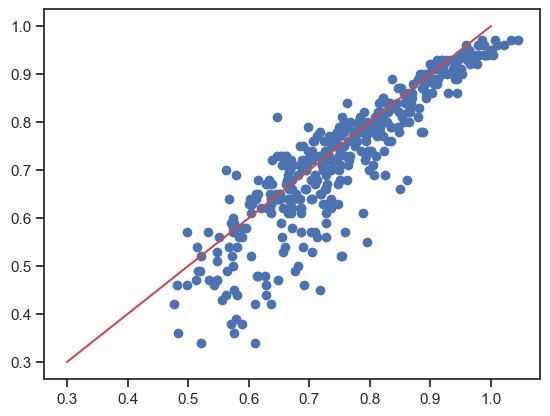

In [30]:
x=np.linspace(0.3,1,101) 
plt.scatter(pipeline_optimizer.predict(X), y.reshape(-1, 1))
plt.plot(x,x,'r')
plt.show()

In [34]:
from sklearn.inspection import permutation_importance


result_con_auto_ml = permutation_importance(
    pipeline_optimizer, X_test_con, y_test_con.to_numpy().ravel().astype('float32'), n_repeats=10, random_state=42, n_jobs=2
)

regr_con_importances_auto_ml = pd.Series(result_con_auto_ml.importances_mean,index=X_con.columns)
print(regr_con_importances_auto_ml)
fig, ax = plt.subplots()
regr_con_importances.plot.bar(yerr=result_conresult_con_auto_ml.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


PicklingError: Could not pickle the task to send it to the workers.